In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [10]:
df_train = pd.read_csv("../data_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
0,0.0,10.0,950.000000,1074.0,274.986868,782.0,-0.319753,-1.432466,325.821586,1.000000,...,1.000000,172.000000,10.000000,9.000000,252.222222,10656.395062,87.777778,10339.061728,135.800000,4315.560000
1,0.0,17.0,574.500000,582.0,104.913059,378.0,0.158313,-0.696295,336.569414,1.000000,...,0.882353,-15.000000,15.000000,4.000000,158.000000,3944.000000,73.000000,6555.000000,-1.066667,697.528889
2,3.0,16.0,593.600000,594.0,4.687572,18.0,0.396421,-0.312612,94.909877,1.000000,...,1.000000,-4.000000,16.000000,15.000000,122.400000,2058.773333,12.533333,1360.782222,95.500000,68.750000
3,3.0,23.0,420.090909,420.0,3.591772,12.0,-0.021014,-0.856142,254.059787,0.826087,...,0.739130,-9.000000,6.000000,4.000000,40.666667,1120.888889,5.333333,1504.888889,12.000000,1464.000000
4,1.0,9.0,1068.750000,1075.0,25.118469,76.0,-0.276816,-1.271399,461.130814,1.000000,...,1.000000,2.000000,9.000000,8.000000,122.000000,671.000000,19.750000,569.437500,136.444444,43.358025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3.0,16.0,615.733333,596.0,51.114860,152.0,2.153820,2.645687,365.256750,1.000000,...,0.003757,0.022262,0.003757,0.003757,0.044242,0.044242,0.043021,0.043021,0.037385,0.037385
8512,1.0,9.0,1091.500000,1093.0,5.894913,18.0,-0.311206,-1.184514,358.414529,1.000000,...,0.888889,-3.000000,9.000000,8.000000,81.428571,1294.530612,-40.000000,1746.285714,155.333333,4722.666667
8513,2.0,15.0,654.428571,648.0,107.653355,458.0,0.475616,0.784000,180.045117,1.000000,...,1.000000,-4.000000,15.000000,14.000000,77.142857,2213.551020,-1.714286,2686.204082,104.000000,3602.666667
8514,1.0,9.0,1075.000000,1083.0,24.535688,66.0,-0.263431,-1.567800,251.455499,1.000000,...,1.000000,14.000000,9.000000,8.000000,101.142857,4933.551020,-10.750000,7259.937500,88.222222,202.172840


In [11]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [12]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [13]:
df_test = pd.read_csv("../data_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,459.037295,1.000000,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,398.464564,1.000000,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,340.802438,1.000000,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,412.324324,1.000000,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,168.041577,0.956522,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,1071.250000,1062.0,36.509417,118.0,1.263183,0.543003,364.303573,0.888889,...,0.777778,0.000000,9.0,8.0,342.857143,2843.265306,205.142857,11207.836735,96.000000,2281.142857
2126,1.0,8.0,1196.000000,1202.0,33.839959,102.0,-0.454057,-1.036905,181.876516,1.000000,...,1.000000,-26.000000,8.0,7.0,137.666667,228.555556,87.714286,14282.775510,169.142857,46.693878
2127,3.0,16.0,595.600000,590.0,23.734082,82.0,0.371174,-0.657132,137.696567,1.000000,...,1.000000,-8.000000,16.0,14.0,102.714286,1270.061224,7.285714,361.489796,90.400000,2186.240000
2128,1.0,8.0,1080.285714,996.0,180.470587,448.0,0.587475,-1.363827,561.988537,1.000000,...,1.000000,18.000000,8.0,5.0,62.400000,51.840000,-45.200000,0.960000,101.000000,5002.000000


In [14]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [15]:
x_test = scale.transform(x_test)

In [16]:
pca = PCA(n_components= 0.9)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4258, 51)
Vallidation: (4258, 51)


In [18]:
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [19]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [20]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [21]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4258, 24)
X_test_meta:(2130, 24)


In [22]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
model = LGBMClassifier()
params = {
    'objective':['multiclass'],
    'boosting':['gbdt', 'rf', 'dart'],
    'data_sample_strategy':['bagging', 'goss'],
    'learning_rate':[0.01,0.1,1],
    'estimators':[50,100,200]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4082
[LightGBM] [Info] Number of data points in the train set: 2838, number of used features: 24
[LightGBM] [Info] Start training from score -1.565660
[LightGBM] [Info] Start training from score -1.006768
[LightGBM] [Info] Start training from score -1.563976
[LightGBM] [Info] Start training from score -1.530860
[LightGBM] [Warning] No further splits with positive

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
27 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\lightgbm\sklearn.py", line 1268, in fit
    super().fit(
  File "c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\lightgbm\sklearn.py", line 954, in fit
    self._Booster = train(
  File "c:

In [23]:
result_test = grid_model.predict(X_test_meta)

[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


In [24]:
grid_model.best_params_

{'boosting': 'rf',
 'data_sample_strategy': 'goss',
 'estimators': 50,
 'learning_rate': 0.1,
 'objective': 'multiclass'}

In [25]:
grid_model.best_score_

0.9377633194043282

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

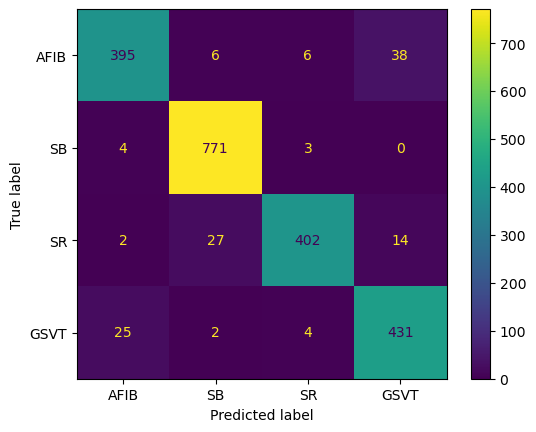

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.961972,0.887640,0.927230,0.907003,0.981602
1,SB,0.980282,0.991003,0.956576,0.973485,0.974112
2,SR,0.973709,0.903371,0.968675,0.934884,0.992285
3,GSVT,0.961033,0.932900,0.892340,0.912169,0.968825
4,macro avg,NaN,0.931885,0.936205,0.928729,NaN
5,micro avg,NaN,0.938498,0.938498,0.938498,NaN
6,weighted avg,NaN,0.938232,0.939040,0.938498,NaN


In [27]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [28]:
df_evaluation_test.to_csv("./Result/Blending_LGB_PCA.csv")